In [35]:
import pandas as pd
import seaborn as sns
from pandasai import Agent
from langchain_ollama import OllamaLLM

In [18]:
# Load Data
df = pd.read_csv("../logs/mac/Mac_2k.log_structured.csv")
df["Combined"] = df["Month"] + " " + df["Date"].astype(str) + " " + df["Time"]
df["Datetime"] = pd.to_datetime(df["Combined"], format='%b %d %H:%M:%S')
df.drop(columns = ["Date", "Month", "Time"], inplace = True)

In [60]:
# LLM
llm = OllamaLLM(
    model = "codellama:7b",
    temperature = 0.1
)

# Running PandasAI
pandas_ai_agent = Agent(
    df, 
    description = """
    You are a data analysis agent tasked with the main goal to answer any data related queries. 
    Everytime I ask you a question, you should provide the code to that specifically answers the question.
    """,
    config = {
        "llm" : llm,
        "enable_cache" : False
})

Unfortunately, I was not able to answer your question, because of the following error:

Value type <class 'pandas.core.series.Series'> must match with type bar



Traceback (most recent call last):
  File "c:\Users\regan\Documents\NUS\NUS Modules\Year 4 Semester 1\BT4103\.venv\lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "c:\Users\regan\Documents\NUS\NUS Modules\Year 4 Semester 1\BT4103\.venv\lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\Users\regan\Documents\NUS\NUS Modules\Year 4 Semester 1\BT4103\.venv\lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
  File "c:\Users\regan\Documents\NUS\NUS Modules\Year 4 Semester 1\BT4103\.venv\lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\Users\regan\Documents\NUS\NUS Modules\Year 4 Semester 1\BT4103\.venv\lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 97, in execute
    raise InvalidOutputValueMismatch(
pandasai.exceptions.InvalidOutputValueMismatch: Value type <class

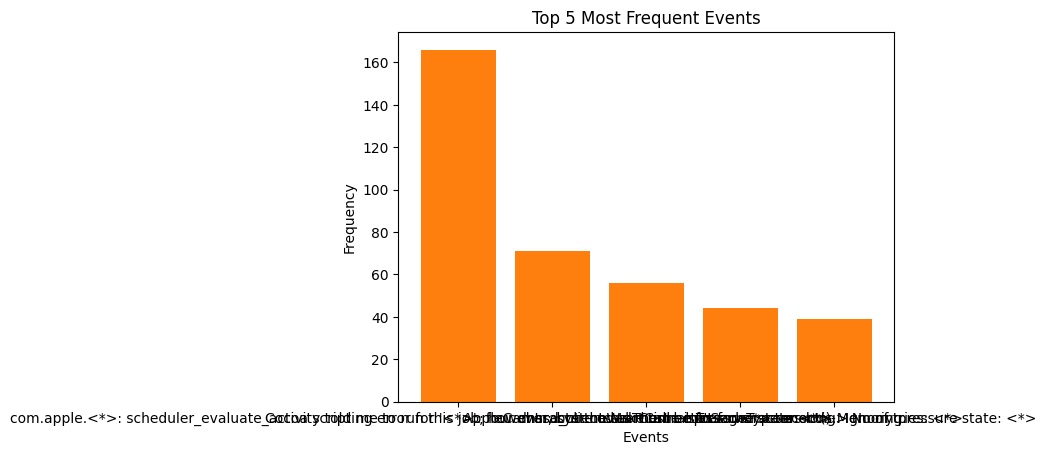

In [65]:
prompt = """
The following is the prompt from the user:
Can you plot the top 5 most frequent event in a bar chart?

You are to following the instructions below strictly:
- dfs: list[pd.DataFrame] is already provided.
- You must not provide a return statement.
- Any query related to Date or Time, refer to the 'Datetime' column.
- Any query related to ERROR, WARNING or EVENT, refer to the EventTemplate column.
"""

print(pandas_ai_agent.chat(prompt))